# Final Project Checkpoint 2
### By Shriyans Sairy, Vahinreddy Palle, and Arjav Jain

## Data Preprocessing

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/CMSC320 dataset/2024_player_predictions.csv')
df2 = pd.read_csv('/content/drive/MyDrive/CMSC320 dataset/combined_data_2000-2023.csv')
df.head()

,team,player_id,player_name,position,depth,draft_year,draft_round,draft_pick,draft_ovr,height,...,fantasy_points_ppr,position_fantasy_rank,total_fantasy_rank,pass_attempts,complete_pass,incomplete_pass,passing_yards,passing_air_yards,interception,pass_td
0,BUF,00-0034857,Josh Allen,QB,1,2018,1,7,7,77,...,374.48,1,1,522,322,150,3537,3817,11,25
1,DAL,00-0036358,CeeDee Lamb,WR,1,2020,1,17,17,74,...,373.00,1,2,0,0,0,0,0,0,0
2,DAL,00-0033077,Dak Prescott,QB,1,2016,4,37,135,74,...,368.36,2,3,611,391,161,3949,4334,6,29
3,MIA,00-0033040,Tyreek Hill,WR,1,2016,5,28,165,70,...,365.90,2,4,0,0,0,0,0,0,0
4,PHI,00-0036389,Jalen Hurts,QB,1,2020,2,21,53,73,...,357.16,3,5,501,303,143,3174,3520,8,20


## Basic Data Exploration and Summary Statistics

### Conclusion 1: Comparing the Distributions of Fantasy Rankings of QBs and WRs


Let's compare the distributions of position fantasy ranks for quarterbacks and wide receivers. We will do so by conducting a two sample T-test with the following hypotheses:

$h_0= $ There is no significant difference in mean fantasy rankings of quarterbacks and wide receivers \\
$h_A= $ There is a significant difference in mean fantasy rankings of quarterbacks and wide receivers

In [51]:
from scipy import stats

qb_fantasy_rank = df[df['position'] == 'QB']['position_fantasy_rank']
wr_fantasy_rank = df[df['position'] == 'WR']['position_fantasy_rank']

t_stat, p_value = stats.ttest_ind(qb_fantasy_rank, wr_fantasy_rank)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -5.285739887077887, P-value: 7.591124632677668e-07


Since the p-value is much smaller than 0.05, we reject the null hypothesis. This means there is a statistically significant difference between the fantasy rankings of quarterbacks (QB) and wide receivers (WR).
The negative t-statistic suggests that, on average, quarterbacks (QB) have a better (lower) fantasy ranking than wide receivers (WR).

<ipython-input-52-13fa7512525b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='position', y='position_fantasy_rank', data=df_subset, palette='Set2')


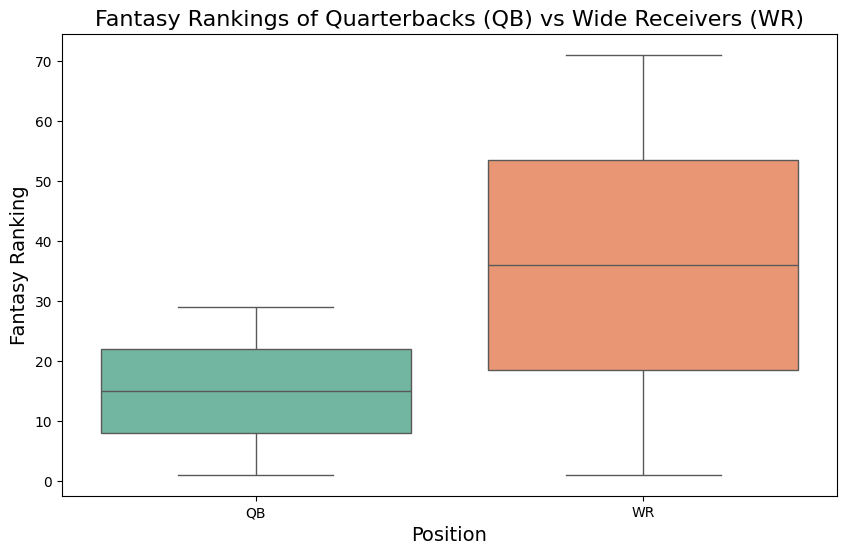

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of the data for QB and WR fantasy ranks
df_subset = df[df['position'].isin(['QB', 'WR'])]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='position', y='position_fantasy_rank', data=df_subset, palette='Set2')

# Add labels and title
plt.title('Fantasy Rankings of Quarterbacks (QB) vs Wide Receivers (WR)', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Fantasy Ranking', fontsize=14)

# Display the plot
plt.show()

### Conclusion 2: Comparing the Distributions of Contract Amounts Across Different Positions


Let's compare the distributions of contracts across different positions. We will do so by conducting a chi-squared test with the following hypotheses:

$h_0= $ The position of an NFL player does not affect the amount of total money they will receive in their contract \\
$h_A= $ The position of an NFL player affects the amount of total money they will receive in their contract

In [53]:
from scipy.stats import chi2_contingency

position = df['position']
# df2 is the df for the 2nd dataset
contract = df2['value_norm']

# Create a contingency table
contingency_table = pd.crosstab(position, contract)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 506.3533106686093
p-value: 0.3880841152895273
Degrees of Freedom: 498
Expected Frequencies:
 [[0.16477273 0.16477273 0.32954545 0.16477273 0.16477273 0.16477273
  0.16477273 0.32954545 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.32954545 0.16477273 0.16477273
  0.32954545 0.16477273 0.16477273 0.16477273 0.32954545 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.32954545 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
  0.16477273 0.16477273 0.16477273 0.16477273 0.16477273 0.16477273
 

Since the p-value is greater than the typical significance level (e.g., 0.05), we fail to reject the null hypothesis. This means that there is no statistically significant evidence to suggest that the position of an NFL player affects the total contract amount they receive. The chi-square statistic of 506.35 with 498 degrees of freedom suggests that the observed frequencies (actual contract amounts by position) do not differ significantly from the expected frequencies (what we would expect if there were no relationship between position and contract amount).

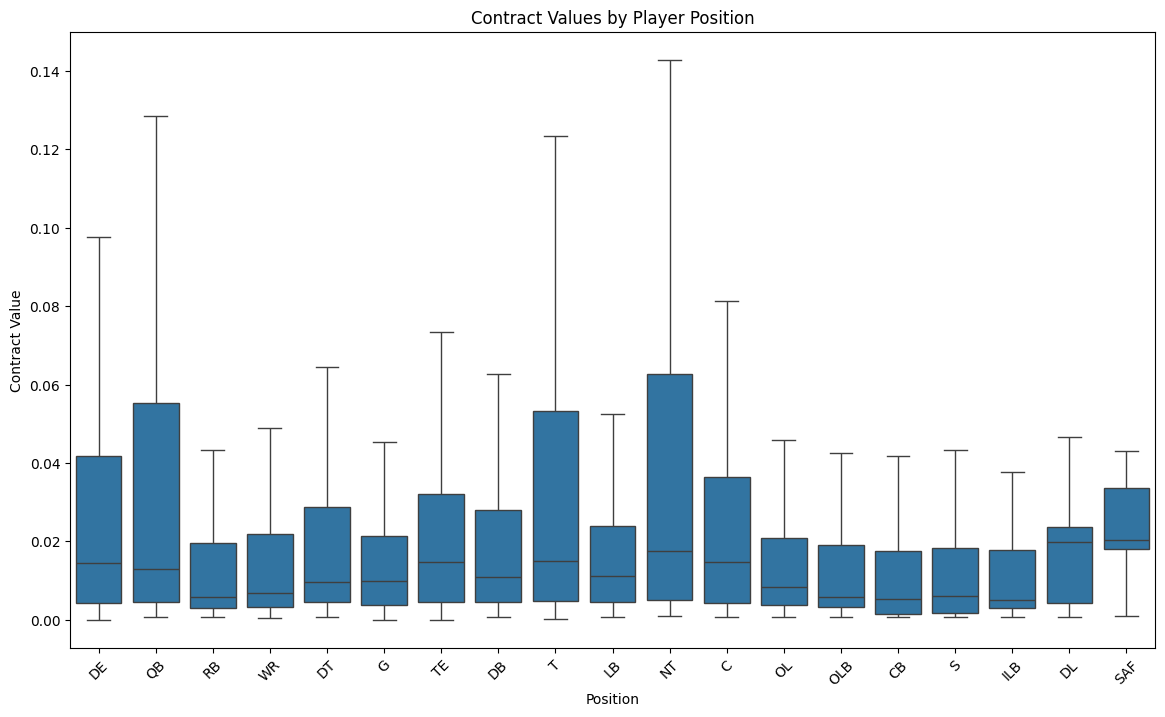

In [54]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='pos', y='value_norm', data=df2, showfliers=False)
plt.title('Contract Values by Player Position')
plt.xlabel('Position')
plt.ylabel('Contract Value')
plt.xticks(rotation=45)
plt.show()

### Conclusion 3: Comparing Average Fantasy Points by Position

Calculate the mean or median fantasy points for each position and compare them.

In [55]:
mean_fantasy_points_by_position = df.groupby('position')['fantasy_points_ppr'].mean()
mean_fantasy_points_by_position

,fantasy_points_ppr
position,
QB,237.280000
RB,187.850000
TE,114.627778
WR,179.043662


According to the analysis, quarterbacks seem to have the highest average fantasy points of 237.28, followed by running backs with 187.85, and wide receivers with 179.04. Surprisingly, tight ends have the lowest average of fantasy points at 114.63. It is implied that, in terms of producing fantasy points, quarterbacks tend to be the most productive position, while tight ends tend to average less. The reason for these relatively high points for quarterbacks could be that they play a key role in most offensive activities, hence the high value in fantasy leagues.

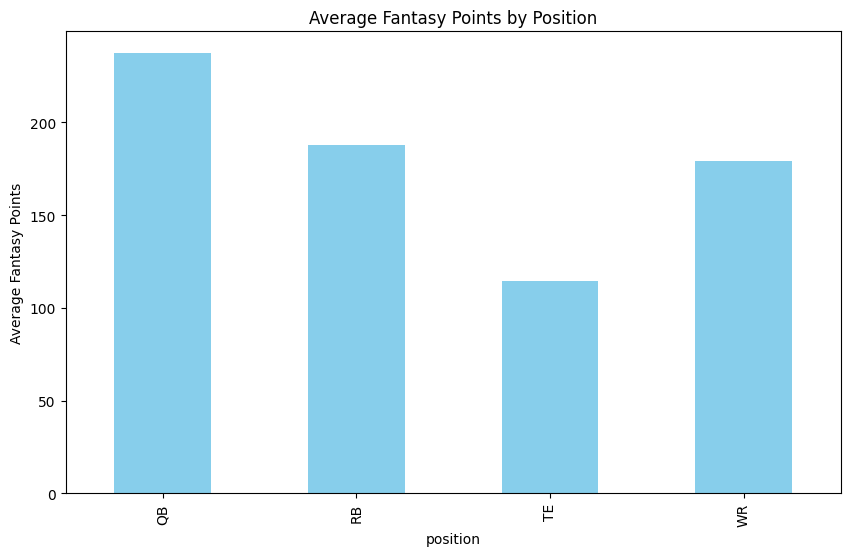

In [56]:
# BAR PLOT
# Create a bar plot of the mean fantasy points by position
plt.figure(figsize=(10,6))
mean_fantasy_points_by_position.plot(kind='bar', color='skyblue')
plt.title('Average Fantasy Points by Position')
plt.ylabel('Average Fantasy Points')
plt.show()

# Conclusion
These results have shown us possible avenues to explore for trying to predict how contract values and positions could influence fantasy rankings and/or player performance.